In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

**Part A : Predicting CO2 Emission**

In [2]:
fuel_data = pd.read_csv("fuel_consumption_dataset.csv")


In [3]:
print("\nFuel Consumption Dataset:\n", fuel_data.head())


Fuel Consumption Dataset:
    MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33         

In [4]:
X = fuel_data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y = fuel_data['CO2EMISSIONS']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model_co2 = LinearRegression()
model_co2.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred_co2 = model_co2.predict(X_test)

In [9]:
print("\n----- CO2 Emission Model Performance -----")
print("R² Score:", r2_score(y_test, y_pred_co2))
print("MAE:", mean_absolute_error(y_test, y_pred_co2))
print("MSE:", mean_squared_error(y_test, y_pred_co2))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_co2)))


----- CO2 Emission Model Performance -----
R² Score: 0.875970520691407
MAE: 16.721593983516485
MSE: 512.8551370148301
RMSE: 22.64630515149944


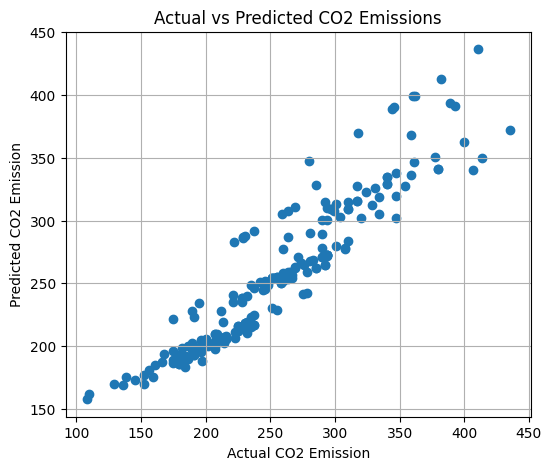

In [10]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_co2)
plt.xlabel("Actual CO2 Emission")
plt.ylabel("Predicted CO2 Emission")
plt.title("Actual vs Predicted CO2 Emissions")
plt.grid(True)
plt.show()

**PART B: PREDICTING USED CAR SELLING PRICE**

In [11]:
car_data = pd.read_csv("used_cars_dataset.csv")

In [12]:
print("\nUsed Cars Dataset:\n", car_data.head())


Used Cars Dataset:
                        name  year  km_driven    fuel seller_type transmission  \
0             Maruti 800 AC  2007      70000  Petrol  Individual       Manual   
1  Maruti Wagon R LXI Minor  2007      50000  Petrol  Individual       Manual   
2      Hyundai Verna 1.6 SX  2012     100000  Diesel  Individual       Manual   
3    Datsun RediGO T Option  2017      46000  Petrol  Individual       Manual   
4     Honda Amaze VX i-DTEC  2014     141000  Diesel  Individual       Manual   

          owner  selling_price  
0   First Owner          60000  
1   First Owner         135000  
2   First Owner         600000  
3   First Owner         250000  
4  Second Owner         450000  


In [17]:
print("\nUsed Cars Dataset Loaded Successfully!")
print("\nColumn Names:", list(car_data.columns))


Used Cars Dataset Loaded Successfully!

Column Names: ['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price']


In [18]:
possible_targets = ['Selling_Price', 'selling_price', 'Price', 'price', 'sellingprice', 'SellingPrice']

target_col = None
for col in car_data.columns:
    if col in possible_targets:
        target_col = col
        break

if target_col is None:
    raise ValueError(" Could not detect target column! Rename your selling price column to 'Selling_Price'.")

print("\nTarget Column Detected:", target_col)



Target Column Detected: selling_price


In [19]:
X = car_data.drop(columns=[target_col])
y = car_data[target_col]

In [20]:
X = pd.get_dummies(X, drop_first=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model_car = LinearRegression()
model_car.fit(X_train, y_train)

y_pred_car = model_car.predict(X_test)

In [23]:
print("\n----- Used Car Price Model Performance -----")
print("R² Score:", r2_score(y_test, y_pred_car))
print("MAE:", mean_absolute_error(y_test, y_pred_car))
print("MSE:", mean_squared_error(y_test, y_pred_car))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_car)))


----- Used Car Price Model Performance -----
R² Score: 0.6011491180908461
MAE: 123591.41987699387
MSE: 121717437737.29326
RMSE: 348880.2627511239


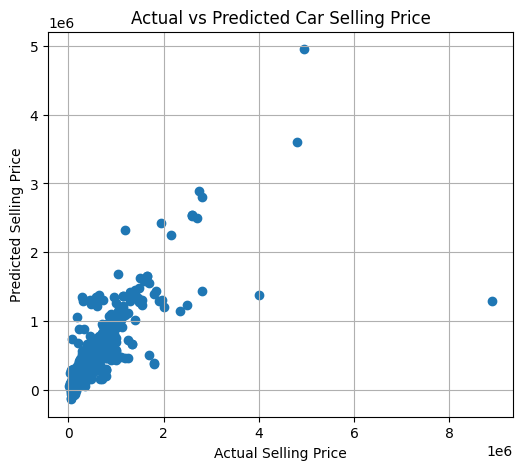

In [24]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_car)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Selling Price")
plt.grid(True)
plt.show()